# Técnicas de Clustering: Normalización
## 1. Importar 

In [85]:
# librerias

# manejo de datos
import numpy as np
import pandas as pd 

# normalización
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from scipy.cluster.vq import whiten

# supresión de errores
import warnings
warnings.filterwarnings('ignore')

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# cluster kmeans
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# cluster jerárquico 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import ward, fcluster, linkage, dendrogram
from scipy.spatial.distance import pdist




In [86]:
# importar datos
path ='LiverPatient.csv'

raw_data =pd.read_csv(path, header =0)
# añadir nombres de las columnas
raw_data.columns= ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG', 'Status']
all_data = raw_data.copy()
raw_data.copy()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## 2. Preprocesamiento

In [87]:
# Transformar gender a categorica 
all_data['Gender'].replace('Female',0 ,inplace=True)
all_data['Gender'].replace('Male',1,inplace=True)
all_data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [88]:
# Quitar missing values
all_data = all_data.dropna()
print ('Data whitout NaN Shape:', all_data.shape)

Data whitout NaN Shape: (578, 11)


## 2.1. Normalización

Como se ha visto en el EDA, es necesario evaluar estrategias de normalización de los datos, a continuación se presentan algunas:  
- Función 'whiten' de la librería 'scipy'. Reescala cada valor en función de su desviación estándard. Al dividir cada valor por la desviación estándard, cada variable tendrá varianza = 1. 
- MinMax Scaler. Iguala el valor mínimo a cero y el máximo a uno, por lo que todos los datos tomarán valores entre 0 y 1 sin cambiar la forma de la distribución original. 
- Z-score. Se normaliza cada valor de manera que la media es 0 y la desviación estándard sea 1. 

In [89]:
# data normalization

whiten_data = whiten(all_data.to_numpy())
whiten_data = pd.DataFrame(whiten_data)
whiten_data.columns= ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG', 'Status']


In [90]:
scaler = MinMaxScaler()
print(scaler.fit(all_data))
MinMaxScaler()
mm_data = scaler.transform(all_data)

mm_data = pd.DataFrame(mm_data)
mm_data.columns= ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG', 'Status']
mm_data

MinMaxScaler()


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
1,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
2,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
3,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0
4,0.488372,1.0,0.018767,0.030612,0.070835,0.004523,0.000813,0.710145,0.760870,0.400,0.0
...,...,...,...,...,...,...,...,...,...,...,...
573,0.651163,1.0,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,1.0
574,0.418605,1.0,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,0.0
575,0.558140,1.0,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,0.0
576,0.313953,1.0,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,0.0


In [91]:
zscore = all_data.apply(stats.zscore)
zscore

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,1.064979,0.562698,1.217342,1.421734,1.673161,-0.094117,-0.036486,0.939421,0.077750,-0.648168,-0.632073
1,1.064979,0.562698,0.639193,0.924557,0.814926,-0.115956,-0.146897,0.478404,0.203630,-0.178810,-0.632073
2,0.818065,0.562698,-0.372568,-0.389410,-0.449841,-0.367098,-0.312515,0.293998,0.329510,0.165385,-0.632073
3,1.682266,0.562698,0.093163,0.178792,-0.396458,-0.296123,-0.177950,0.755014,-0.929292,-1.712044,-0.632073
4,0.077321,0.562698,-0.244091,-0.282872,-0.343075,-0.339800,-0.333217,1.031624,1.588312,1.104099,-0.632073
...,...,...,...,...,...,...,...,...,...,...,...
577,0.941522,0.562698,-0.452867,-0.495948,0.855990,-0.334341,-0.264210,-0.535832,-1.936333,-1.805915,1.582097
578,-0.293051,0.562698,-0.436807,-0.495948,-0.794778,-0.252446,-0.274561,-0.443629,0.077750,0.478289,-0.632073
579,0.447693,0.562698,-0.404688,-0.460435,-0.191139,-0.181471,-0.212454,-0.074815,0.077750,0.165385,-0.632073
580,-0.848609,0.562698,-0.324389,-0.353897,-0.441628,-0.285204,-0.271110,0.293998,0.329510,0.165385,-0.632073


In [92]:
# seleccionar método de normalización 
#whiten_data 
#mm_data
#zscore
technique = all_data.copy()
drop_st = technique.drop(['Status'], axis=1)

## 3. K-means 

Las observaciones se van a agrupar en un número pre definido de clusters, estas agrupaciones se realizarán intentando minimizar la suma de la varianza interna de cada grupo. Este algoritmo necesita como input el número de clusters que va a generar. Asignará cada observación al centroide con el que tenga menos distancia. El valor del centroide se recalculará cada vez que se asigne un nuevo dato a ese cluster. 
Es una de las técnicas de clustering más utilizadas, pero tiene algunas desventajas, como la necesidad de indicar por adelantado el número de clusters o una asignación aleatoria de los centroides que realiza al principio. Además si el conjunto de datos tiene muchos outliers (como es el caso de este dataset) este tipo de técnica también presenta problemas. 

In [93]:
k = 2

kmeans = KMeans(
    init="random",
    n_clusters=k,
    n_init=10,
    max_iter=300,
    random_state=42 
)
kmeans.fit(drop_st)
labels = kmeans.labels_


In [94]:
y_true = np.array(all_data['Status']).copy()
y_true[y_true == 1] = 0
y_true[y_true == 2] = 1


### 3.1. K-means: métricas

Se utilizará una matriz de confusión para resumir los resultados de la clasificación por k-means con k=2. Se comprobarán los resultados frente a las dos categorías de la variable 'Status. 

<AxesSubplot:>

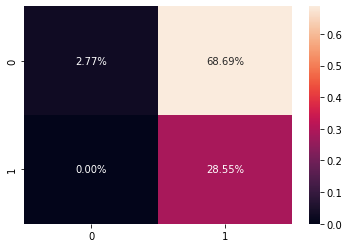

In [95]:
# matriz de confusion 
cf_matrix = confusion_matrix(y_true, labels)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

In [96]:
class_names = ['0', '1']
print(classification_report(y_true, labels, target_names=class_names))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07       413
           1       0.29      1.00      0.45       165

    accuracy                           0.31       578
   macro avg       0.65      0.52      0.26       578
weighted avg       0.80      0.31      0.18       578



## 4. Cluster Jerárquico

Estos algoritmos no requieren que se predefina el número de clusters. Normalmente se represetan ráficamente en forma de dendrograma. Se pueden clasificar en dos grupos, los aglomerativos y los divisivos. Las técnicas de cluster aglomerativo empiezan con todos los datos separados y van progresivamente iterando de manera que los mas cercanos se unen. De manera contraria los divisivos empiezan con todas las observaciones juntas y se van separando en función de la distancia entre puntos. Existen varios métodos que permiten medir dicha distancia: 
- Single: la menor distancia entre dos puntos de cada cluster
- Complete: mayor distancia entre dos puntos de cada cluster 
- Mean: media entre todos los puntos de los dos clusters 
- Centroid: distancia entre los centroides de los dos clusters 
- Ward: varianza mínima en un cluster


### 4.1. Clustering de una unión

In [97]:
# matriz de distancias
distance_matrix = linkage(drop_st, method = 'single', metric = 'euclidean')

<AxesSubplot:>

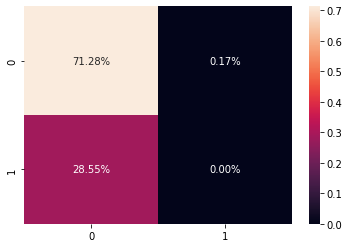

In [98]:
y_pred = fcluster(distance_matrix, 2, criterion='maxclust')
y_true = np.array(all_data['Status']).copy()
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

In [99]:
class_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       413
           1       0.00      0.00      0.00       165

    accuracy                           0.71       578
   macro avg       0.36      0.50      0.42       578
weighted avg       0.51      0.71      0.59       578



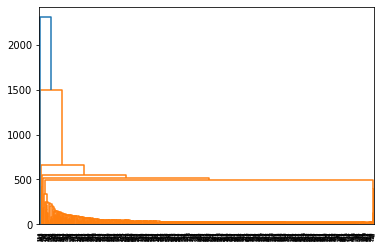

In [100]:
# Create a dendrogram
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.show()

In [101]:
# matriz de distancias
distance_matrix = linkage(drop_st, method = 'complete', metric = 'euclidean')

<AxesSubplot:>

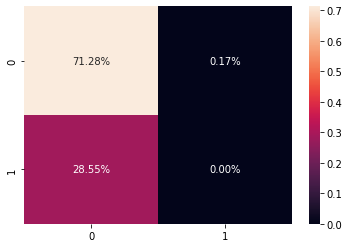

In [102]:
y_pred = fcluster(distance_matrix, 2, criterion='maxclust')
y_true = np.array(all_data['Status']).copy()
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

In [103]:
class_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       413
           1       0.00      0.00      0.00       165

    accuracy                           0.71       578
   macro avg       0.36      0.50      0.42       578
weighted avg       0.51      0.71      0.59       578



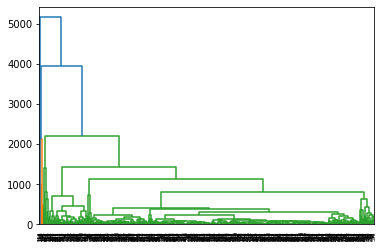

In [104]:
# Create a dendrogram
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.show()

In [105]:
# matriz de distancias
distance_matrix = linkage(drop_st, method = 'average', metric = 'euclidean')

<AxesSubplot:>

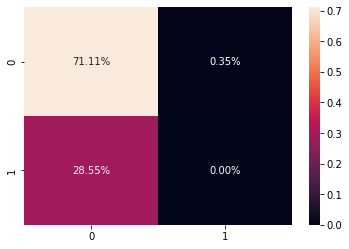

In [106]:
y_pred = fcluster(distance_matrix, 2, criterion='maxclust')
y_true = np.array(all_data['Status']).copy()
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

In [107]:
class_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       413
           1       0.00      0.00      0.00       165

    accuracy                           0.71       578
   macro avg       0.36      0.50      0.42       578
weighted avg       0.51      0.71      0.59       578



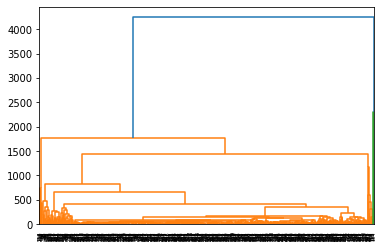

In [108]:
# Create a dendrogram
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.show()

In [109]:
# matriz de distancias
distance_matrix = linkage(drop_st, method = 'centroid', metric = 'euclidean')

<AxesSubplot:>

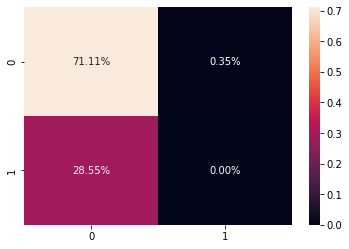

In [110]:
y_pred = fcluster(distance_matrix, 2, criterion='maxclust')
y_true = np.array(all_data['Status']).copy()
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

In [111]:
class_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       413
           1       0.00      0.00      0.00       165

    accuracy                           0.71       578
   macro avg       0.36      0.50      0.42       578
weighted avg       0.51      0.71      0.59       578



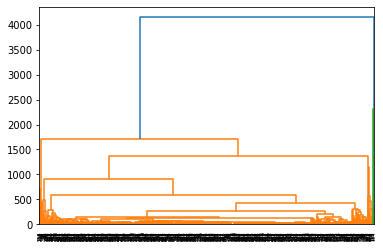

In [112]:
# Create a dendrogram
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.show()

In [113]:
# matriz de distancias
distance_matrix = linkage(drop_st, method = 'ward', metric = 'euclidean')

<AxesSubplot:>

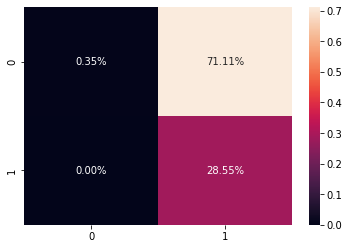

In [114]:
y_pred = fcluster(distance_matrix, 2, criterion='maxclust')
y_true = np.array(all_data['Status']).copy()
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

In [115]:
class_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       413
           1       0.29      1.00      0.45       165

    accuracy                           0.29       578
   macro avg       0.64      0.50      0.23       578
weighted avg       0.80      0.29      0.13       578



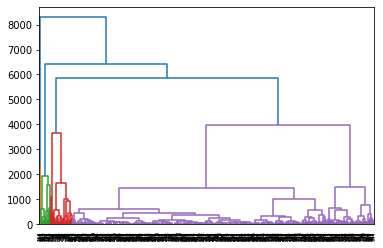

In [116]:
# Create a dendrogram
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.show()